<a href="https://colab.research.google.com/github/Imani-C/Machine_learning_Assignment1/blob/patch-1/ML4F_2023_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 -- ML4F 2023

## Instructions
* This assignment covers the material discussed in Lectures ML1 - ML4.
* Each group submits _only one_ notebook via canvas on the assignment page.
* The notebook should be named `assignment1_groupXX.ipynb` where `XX` is your group number,  
e.g. for group 3 this will be `assignment1_group03.ipynb`.
* The notebook should run without raising any errors.
* We recommend keeping the folder structure
```
assignment/
    data/
    lib/
    assignment1_groupXX.ipynb
```
* We strongly recommend git, as you are encouraged to collaborate and split up the work and maybe even start independently. To see how to set up your own repo for your group, see `VU Workshop Introduction to Version Control with GIT.pptx` discussed in week 2.
* Do not spend time on optimizing the speed of your code. However, if it runs for more than 5 minutes, we will terminate it.
* We strongly encourage you to experiment, try different approaches and combinations and get to know the problem from alternative angles. But the final notebook should only contain the necessary results for grading.
----

<div style="font-size:24px; text-align:center; font-weight:bold">Good luck!</div>

----

# Assignment 1 - Features & Algorithms

Kiwibank, a commercial bank from New Zealand, is interested in updating their loan default prediction algorithm. They used to check each client manually, and now they want to use Machine Learning to predict who will default on their loan and pose a threat to the bank's balance sheet. They have supplied you with a dataset of their past clients, and they've asked you to consult them on their adaptation of Machine Learning in this process.

First take a look at the data, then test different algorithms, select key features and write a recommendation to the bank.

State your imports below.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    PowerTransformer,
    StandardScaler,
    minmax_scale,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import column_or_1d
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [ ]:
#Load data
data = pd.read_csv("/content/7_ML4F_Assignment1Data.csv")

In [ ]:
#Understanding the dataset
data.head()

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0,2814126,8220,7541,16677.310300,58,BAT2252229,11.093450,C,B3,...,8.681568,0.923242,0,INDIVIDUAL,74,0,24,486498,63090,0
1,1,60461819,5806,10460,26921.459530,36,BAT224923,7.167189,A,B5,...,0.538751,1.279298,0,INDIVIDUAL,72,0,30,199804,35652,0
2,2,30315706,15244,31724,13800.306530,59,BAT2833642,16.125747,D,E3,...,1.072393,0.997230,0,INDIVIDUAL,13,0,30,33352,4585,0
3,3,35094493,7684,8893,12163.798130,59,BAT1467036,12.627483,E,C1,...,6.759186,0.903630,0,INDIVIDUAL,92,0,28,30568,7749,0
4,4,2803253,13333,8238,5709.237854,59,BAT4271519,13.345461,A,C3,...,4.335110,0.784438,0,INDIVIDUAL,4,0,30,292225,27098,0


In [ ]:
#Understanding the dataset
data.dtypes

Unnamed: 0                        int64
ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64


In [ ]:
#Analyzing Numerical Columns
data.describe()

#Select Numerical Columns
numerical_columns = data.select_dtypes(include='number').columns

#Visualize Distribution of Numerical Features using Histogram
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column} ')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [ ]:
# Check unique values
unique_values = data["Loan Amount"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Loan Amount"].value_counts()
print("\nValue Counts:\n", value_counts)

Unique Values: [ 8220  5806 15244 ...  9021 10424 19358]

Value Counts:
 14592    5
16107    5
14355    4
21759    4
18686    4
        ..
20849    1
13572    1
20677    1
11238    1
19358    1
Name: Loan Amount, Length: 8511, dtype: int64


In [ ]:
# Check unique values
unique_values = data["Term"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Term"].value_counts()
print("\nValue Counts:\n", value_counts)

Unique Values: [58 36 59]

Value Counts:
 59    6443
58    3327
36     230
Name: Term, dtype: int64


In [ ]:
# Check unique values
unique_values = data["Interest Rate"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Interest Rate"].value_counts()
print("\nValue Counts:\n", value_counts)

min_values = data["Interest Rate"].min()
max_values = data["Interest Rate"].max()
print(min_values)
print(max_values)

Unique Values: [11.0934499   7.16718873 16.12574664 ...  6.40260211  8.05194377
 19.25283056]

Value Counts:
 15.789608    2
11.093450    1
11.455946    1
7.606912     1
11.389628    1
            ..
12.462949    1
14.130836    1
15.077785    1
17.876102    1
19.252831    1
Name: Interest Rate, Length: 9999, dtype: int64
5.321130759
27.18234758


In [ ]:
# Check unique values
unique_values = data["Home Ownership"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Home Ownership"].value_counts()
print("\nValue Counts:\n", value_counts)

min_values = data["Home Ownership"].min()
max_values = data["Home Ownership"].max()
print(min_values)
print(max_values)

Unique Values: [70272.33772 53661.80037 47634.53371 ... 61342.86812 67499.1748
 83700.00644]

Value Counts:
 70272.33772     1
32963.90568     1
62745.80344     1
116968.21120    1
109027.96300    1
               ..
70888.64021     1
88699.31083     1
42819.97480     1
172235.95020    1
83700.00644     1
Name: Home Ownership, Length: 10000, dtype: int64
14652.379680000002
401352.3764


In [ ]:
# Check unique values
unique_values = data["Delinquency - two years"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Delinquency - two years"].value_counts()
print("\nValue Counts:\n", value_counts)

Unique Values: [0 1 6 7 2 3 4 5 8]

Value Counts:
 0    7694
1    1780
2     383
3      67
7      32
6      22
5      13
8       6
4       3
Name: Delinquency - two years, dtype: int64


In [ ]:
# Check unique values
unique_values = data["Inquires - six months"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Inquires - six months"].value_counts()
print("\nValue Counts:\n", value_counts)

Unique Values: [0 1 2 3 4 5]

Value Counts:
 0    8983
1     663
2     296
3      51
4       6
5       1
Name: Inquires - six months, dtype: int64


In [ ]:
# Check unique values
unique_values = data["Open Account"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Open Account"].value_counts()
print("\nValue Counts:\n", value_counts)

Unique Values: [23 10 12  6 14 22  8 15 34 13  9 20 16 29  5 11 30 21  7 33 19 17 37 32
 18 31 25 28  4 24 27 35 26 36  3  2]

Value Counts:
 12    1291
13    1188
11    1079
14     876
10     854
9      662
8      502
15     492
16     316
7      272
17     252
18     196
19     181
20     170
6      157
21     139
22     126
24     124
25     116
23     100
30      99
26      98
28      88
31      85
32      84
27      83
5       75
29      75
33      69
34      57
4       31
35      26
36      16
37      13
3        7
2        1
Name: Open Account, dtype: int64


In [ ]:
# Check unique values
unique_values = data["Public Record"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Public Record"].value_counts()
print("\nValue Counts:\n", value_counts)

Unique Values: [0 1 2 4 3]

Value Counts:
 0    9320
1     610
2      34
4      28
3       8
Name: Public Record, dtype: int64


In [ ]:
# Check unique values
unique_values = data["Revolving Balance"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Revolving Balance"].value_counts()
print("\nValue Counts:\n", value_counts)

Unique Values: [ 7375  4864  3642 ... 47772  3144  1859]

Value Counts:
 483      6
1610     6
33       5
1897     5
2164     5
        ..
1273     1
35893    1
7581     1
5700     1
1859     1
Name: Revolving Balance, Length: 7514, dtype: int64


In [ ]:
# Check unique values
unique_values = data["Total Received Interest"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Total Received Interest"].value_counts()
print("\nValue Counts:\n", value_counts)

Unique Values: [1983.673909    253.2004202    50.30601203 ... 1373.145733   1536.443984
 4336.838063  ]

Value Counts:
 1983.673909    1
2832.083322    1
2102.525354    1
1327.228839    1
273.097745     1
              ..
1742.302745    1
1233.778615    1
1359.056050    1
259.283371     1
4336.838063    1
Name: Total Received Interest, Length: 10000, dtype: int64


In [ ]:
# Check unique values
unique_values = data["Total Received Late Fee"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Total Received Late Fee"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Total Received Late Fee"].min()
max_values = data["Total Received Late Fee"].max()
print(min_values)
print(max_values)

Unique Values: [4.6270888e-02 1.9000000e-05 8.1158612e-02 ... 4.2623907e-02 9.6675292e-02
 3.7820413e-02]

Value Counts:
 0.000084     2
0.046271     1
0.016890     1
0.050846     1
0.100420     1
            ..
0.038989     1
0.066235     1
30.461274    1
0.079217     1
0.037820     1
Name: Total Received Late Fee, Length: 9999, dtype: int64
3.06e-06
42.5951275


In [ ]:
# Check unique values
unique_values = data["Recoveries"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Recoveries"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Recoveries"].min()
max_values = data["Recoveries"].max()
print(min_values)
print(max_values)


Unique Values: [8.68156842 0.5387509  1.07239349 ... 5.34260592 4.63115139 1.01298642]

Value Counts:
 1.771187    2
3.685422    2
6.027336    1
7.047626    1
1.772956    1
           ..
0.698301    1
1.316812    1
4.968621    1
2.525948    1
1.012986    1
Name: Recoveries, Length: 9998, dtype: int64
0.000372444
4262.898182


In [ ]:
# Check unique values
unique_values = data["Collection Recovery Fee"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Collection Recovery Fee"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Collection Recovery Fee"].min()
max_values = data["Collection Recovery Fee"].max()
print(min_values)
print(max_values)

Unique Values: [0.92324169 1.2792979  0.99723006 ... 0.57417069 1.03368543 0.56171494]

Value Counts:
 0.923242     1
0.918675     1
12.629941    1
0.181854     1
0.465797     1
            ..
0.384881     1
0.149708     1
0.643036     1
0.918843     1
0.561715     1
Name: Collection Recovery Fee, Length: 10000, dtype: int64
7.340000000000001e-05
166.833


In [ ]:
# Check unique values
unique_values = data["Collection 12 months Medical"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Collection 12 months Medical"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Collection 12 months Medical"].min()
max_values = data["Collection 12 months Medical"].max()
print(min_values)
print(max_values)

Unique Values: [0 1]

Value Counts:
 0    9784
1     216
Name: Collection 12 months Medical, dtype: int64
0
1


In [ ]:
# Check unique values
unique_values = data["Accounts Delinquent"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Accounts Delinquent"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Accounts Delinquent"].min()
max_values = data["Accounts Delinquent"].max()
print(min_values)
print(max_values)

Unique Values: [0]

Value Counts:
 0    10000
Name: Accounts Delinquent, dtype: int64
0
0


In [ ]:
# Check unique values
unique_values = data["Total Collection Amount"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Total Collection Amount"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Total Collection Amount"].min()
max_values = data["Total Collection Amount"].max()
print(min_values)
print(max_values)

Unique Values: [   24    30    28    47    12    44    25    53     3   423   641    39
    35    60    23  1490    36    51    40   470    50    21    58   614
    17    16  4309    29     5  1721    11    49    34    32    19    27
    18     9    37     8    26    45  3192    62    57    54  2059    55
    46    15    42    38    41    31     2    14    10    33   537  1516
  1925    22    13    56    48     1    43   574    52    61    20   382
   539   456     4  1392  1673     6  1344  1434   430  1065   497     7
  1511  1407  2664  1505   247  1443   200   387   428  1235  1975  1451
  1178    63   562  2137   355  1066  1324  8390  1437   527   520  5029
  1704   488   443  1383  1519  9865  1869   604 12465  1628   494   499
   600   576   373  3742  4099  1495  2189  1305  2840 10587   617   403
  1197  1698    66  3066  1408   286  1332   301   980  3063  1239   306
   654  1314  1106   510   344  4092  1179  1921   502  3943   198   500
   535  1048  1948   444  1534  4293

In [ ]:
# Check unique values
unique_values = data["Total Current Balance"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Total Current Balance"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Total Current Balance"].min()
max_values = data["Total Current Balance"].max()
print(min_values)
print(max_values)

Unique Values: [486498 199804  33352 ... 176731 326566 143561]

Value Counts:
 51737     4
38232     3
173570    3
32668     3
288022    2
         ..
4629      1
47166     1
65781     1
28622     1
143561    1
Name: Total Current Balance, Length: 9839, dtype: int64
623
1047464


In [ ]:
# Check unique values
unique_values = data["Total Revolving Credit Limit"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Total Revolving Credit Limit"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Total Revolving Credit Limit"].min()
max_values = data["Total Revolving Credit Limit"].max()
print(min_values)
print(max_values)

Unique Values: [63090 35652  4585 ... 35739 48749 10696]

Value Counts:
 5310     5
9270     4
9138     4
28031    4
31447    4
        ..
21469    1
5659     1
1644     1
8738     1
10696    1
Name: Total Revolving Credit Limit, Length: 8931, dtype: int64
1000
193312


In [ ]:
#Check the Distribution of the Target Variable:
sns.countplot(x='Loan Status', data=data)
plt.show()


In [ ]:
# Check unique values
unique_values = data["Loan Status"].unique()
print("Unique Values:", unique_values)

# Or, if you also want to see the counts of each value
value_counts = data["Loan Status"].value_counts()
print("\nValue Counts:\n", value_counts)

#range
min_values = data["Loan Status"].min()
max_values = data["Loan Status"].max()
print(min_values)
print(max_values)

Unique Values: [0 1]

Value Counts:
 0    9058
1     942
Name: Loan Status, dtype: int64
0
1


In [ ]:
loan_status = data[data["Loan Status"] == 0]
loan_status.shape

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0,2814126,8220,7541,16677.310300,58,BAT2252229,11.093450,C,B3,...,8.681568,0.923242,0,INDIVIDUAL,74,0,24,486498,63090,0
1,1,60461819,5806,10460,26921.459530,36,BAT224923,7.167189,A,B5,...,0.538751,1.279298,0,INDIVIDUAL,72,0,30,199804,35652,0
2,2,30315706,15244,31724,13800.306530,59,BAT2833642,16.125747,D,E3,...,1.072393,0.997230,0,INDIVIDUAL,13,0,30,33352,4585,0
3,3,35094493,7684,8893,12163.798130,59,BAT1467036,12.627483,E,C1,...,6.759186,0.903630,0,INDIVIDUAL,92,0,28,30568,7749,0
4,4,2803253,13333,8238,5709.237854,59,BAT4271519,13.345461,A,C3,...,4.335110,0.784438,0,INDIVIDUAL,4,0,30,292225,27098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,68735778,12705,25864,16241.146960,59,BAT1184694,9.015262,A,D3,...,0.743820,1.129702,0,INDIVIDUAL,64,0,29,374197,13703,0
9995,9995,53420276,1979,12097,9576.959690,59,BAT5629144,8.853158,C,F2,...,4.634907,0.487365,0,INDIVIDUAL,74,0,23,145173,35739,0
9996,9996,17946789,9021,26077,8424.137168,59,BAT4808022,14.840662,E,C2,...,5.880057,1.121370,0,INDIVIDUAL,43,0,498,33241,19588,0
9998,9998,6405766,10424,6597,17188.547530,59,BAT2575549,8.051944,D,A1,...,4.631151,1.033685,0,INDIVIDUAL,88,0,50,326566,5413,0


# Preprocessing (15 points)
*5 points for correct code*

*10 points for normalization procedure*

The data consists of 34 features and one target variable, 'Loan Status'
We have 25 numerical features and 9 categorical features. For the numerical features, apply a technique
to make the data more normal. This can be Standardization, Normalization, log or a Box-Cox transformation.
Explain why you might use one method for some features, and another for other features.
Also check for missing values and uninformative features (NO FEATURE SELECTION YET).

Before split the dataset, need to re-balance both loan status class 0 and 1, I used the resample method, to add more data in minority class (loan status = 1)

In [ ]:
#Imbalanced Data, therefore needs to balance both classes
from sklearn.utils import resample

#create two different dataframe of majority and minority class
data_majority = data[(data["Loan Status"]==0)]
data_minority = data[(data["Loan Status"]==1)]

# upsample minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 9058, # to match majority class
                                 random_state=0)

# Combine majority class with upsampled minority class
data = pd.concat([data_minority_upsampled, data_majority])

In [ ]:
#check is there any missing values
missing_values = data.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Unnamed: 0                      0
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 mon

In [ ]:
#Split Data into training set and test set before Preprocessing to prevent information leakage
X = data.iloc[:,2:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Preprocessing
scaler_norm = MinMaxScaler() #Perform Normalization to scaler large range data
scaler_power = PowerTransformer() #Perform Yeo-Johnson to correct skewness and outliners, and transforn non-normally distibution data into normally distibuted

X_train[["Loan Amount", "Term", "Debit to Income", "Public Record", "Inquires - six months", "Revolving Utilities", "Last week Pay"]] = scaler_norm.fit_transform(X_train[["Loan Amount", "Term", "Debit to Income", "Public Record", "Inquires - six months", "Revolving Utilities", "Last week Pay"]])
X_train[["Funded Amount", "Funded Amount Investor", "Interest Rate", "Delinquency - two years", "Home Ownership", "Open Account", "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Received Late Fee", "Recoveries", "Collection Recovery Fee", "Total Collection Amount", "Total Current Balance","Total Revolving Credit Limit"]] = scaler_power.fit_transform(X_train[["Funded Amount", "Funded Amount Investor", "Interest Rate", "Delinquency - two years", "Home Ownership", "Open Account", "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Received Late Fee", "Recoveries", "Collection Recovery Fee", "Total Collection Amount", "Total Current Balance","Total Revolving Credit Limit"]])
X_test[["Loan Amount", "Term", "Debit to Income", "Public Record", "Inquires - six months", "Revolving Utilities", "Last week Pay"]] = scaler_norm.fit_transform(X_test[["Loan Amount", "Term", "Debit to Income", "Public Record", "Inquires - six months", "Revolving Utilities", "Last week Pay"]])
X_test[["Funded Amount", "Funded Amount Investor", "Interest Rate", "Delinquency - two years", "Home Ownership", "Open Account", "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Received Late Fee", "Recoveries", "Collection Recovery Fee", "Total Collection Amount", "Total Current Balance","Total Revolving Credit Limit"]] = scaler_power.fit_transform(X_test[["Funded Amount", "Funded Amount Investor", "Interest Rate", "Delinquency - two years", "Home Ownership", "Open Account", "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Received Late Fee", "Recoveries", "Collection Recovery Fee", "Total Collection Amount", "Total Current Balance","Total Revolving Credit Limit"]])

le = LabelEncoder()
X_train["Batch Enrolled"] = le.fit_transform(X_train["Batch Enrolled"])
X_train["Grade"] = le.fit_transform(X_train["Grade"])
X_train["Sub Grade"] = le.fit_transform(X_train["Sub Grade"])
X_train["Loan Title"] = le.fit_transform(X_train["Loan Title"])
X_train["Employment Duration"] = le.fit_transform(X_train["Employment Duration"])
X_train["Verification Status"] = le.fit_transform(X_train["Verification Status"])
X_train["Payment Plan"] = le.fit_transform(X_train["Payment Plan"])
X_train["Initial List Status"] = le.fit_transform(X_train["Initial List Status"])
X_train["Application Type"] = le.fit_transform(X_train["Application Type"])
X_test["Batch Enrolled"] = le.fit_transform(X_test["Batch Enrolled"])
X_test["Grade"] = le.fit_transform(X_test["Grade"])
X_test["Sub Grade"] = le.fit_transform(X_test["Sub Grade"])
X_test["Loan Title"] = le.fit_transform(X_test["Loan Title"])
X_test["Employment Duration"] = le.fit_transform(X_test["Employment Duration"])
X_test["Verification Status"] = le.fit_transform(X_test["Verification Status"])
X_test["Payment Plan"] = le.fit_transform(X_test["Payment Plan"])
X_test["Initial List Status"] = le.fit_transform(X_test["Initial List Status"])
X_test["Application Type"] = le.fit_transform(X_test["Application Type"])

# Training (30 points)
*10 points for correct code*

*10 points for interpretation results*

*10 points for pitfalls*

We've familiarized ourselves with the data, so now we're going to train some models.
A handful of frequently used models are: Decision Trees (DTC), Nearest Neighbors (KNN) and
Stochastic Gradient Descent learning algorithm (SGD).
Split the data into a training set and a test set, and train all mentioned models on the data.
For KNN, find the optimal number of neighbors.
Use the test set to get the predicted values. Show the performance of the different models in a Confusion Matrix and compare the accuracy, precision, recall and F1-score.

When looking at the resulting measures and matrices, what stands out? What possible pitfalls may be hiding in each of the models?

#I already split data into training set and test set before feature scaling process as to prevent information leakage

In [ ]:
#Cross Vadilation for Decision Tree
from sklearn.model_selection import GridSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
model = DecisionTreeClassifier()
dtree_gscv = GridSearchCV(model, param_grid, cv=5)
dtree_gscv.fit(X_train, y_train)
print(dtree_gscv.best_params_)

{'criterion': 'gini', 'max_depth': 14}


In [ ]:
#Decision Tree
#Decision Tree classifer object
clf_dtc = DecisionTreeClassifier(criterion='gini', max_depth = 14)

# Train Decision Tree Classifer
clf_dtc = clf_dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc = clf_dtc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))
print("Precision:",precision_score(y_test, y_pred_dtc))
print("Recall:",recall_score(y_test, y_pred_dtc))
print("F1 Score:",f1_score(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

Accuracy: 0.7469646799116998
Precision: 0.7103746397694525
Recall: 0.8248745119910764
F1 Score: 0.7633548387096775
[[1228  603]
 [ 314 1479]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1831
           1       0.71      0.82      0.76      1793

    accuracy                           0.75      3624
   macro avg       0.75      0.75      0.75      3624
weighted avg       0.75      0.75      0.75      3624



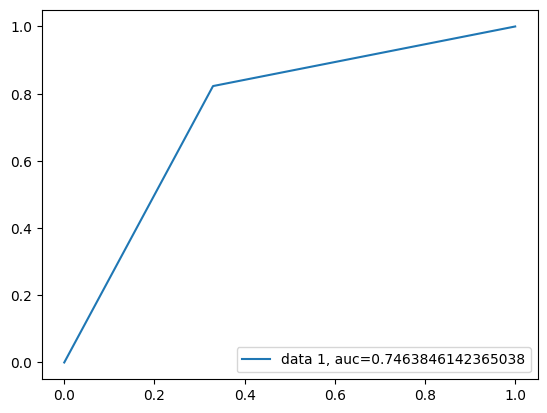

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dtc)
auc = metrics.roc_auc_score(y_test, y_pred_dtc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

[Text(0.4863500197614257, 0.9666666666666667, 'x[16] <= -0.036\ngini = 0.5\nsamples = 14492\nvalue = [7227, 7265]'),
 Text(0.1642713423397528, 0.9, 'x[9] <= -1.367\ngini = 0.498\nsamples = 7533\nvalue = [3546, 3987]'),
 Text(0.03334291463064099, 0.8333333333333334, 'x[16] <= -0.769\ngini = 0.461\nsamples = 454\nvalue = [290, 164]'),
 Text(0.021845357861454442, 0.7666666666666667, 'x[24] <= 0.279\ngini = 0.497\nsamples = 216\nvalue = [99, 117]'),
 Text(0.013797068123023858, 0.7, 'x[24] <= 0.033\ngini = 0.435\nsamples = 153\nvalue = [49, 104]'),
 Text(0.009198045415349238, 0.6333333333333333, 'x[28] <= 0.466\ngini = 0.5\nsamples = 82\nvalue = [41, 41]'),
 Text(0.006898534061511929, 0.5666666666666667, 'x[13] <= 0.52\ngini = 0.424\nsamples = 59\nvalue = [18, 41]'),
 Text(0.004599022707674619, 0.5, 'x[13] <= 0.384\ngini = 0.295\nsamples = 50\nvalue = [9, 41]'),
 Text(0.0022995113538373095, 0.43333333333333335, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.006898534061511929, 0.433333

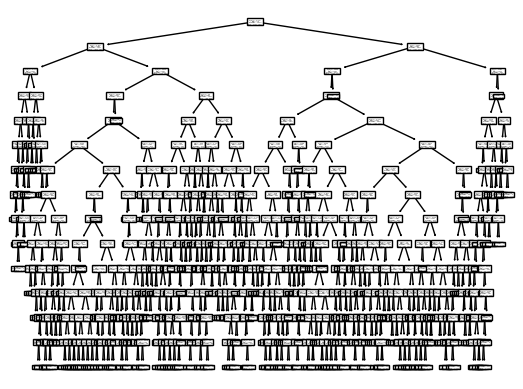

In [ ]:
#Visualization of the Decision Tree
tree.plot_tree(clf_dtc)

#Interpretation - Decision Tree
The Decision Tree model is a not a bad model as AUC is higher than 70%. With Accuracy: 0.7469646799116998
Precision: 0.7103746397694525
Recall: 0.8248745119910764
F1 Score: 0.7633548387096775
The model correctly predicted the class labels for approximately 74.7% of the loan status in the dataset.
71.04% of the data predicted as positive by the model were actually positive, while the model captured 82.49% of the actual positive class with recall score is the proportion of actual positive class that were correctly predicted by the model.

#Pitfall - Decision Tree
With the max_depth equals to 14, the decision tree has chance to encounter overfitting. Decision Tree also has bias with imbalance dataset, but I resample the dataset in the very first beginning, which diminished the bias problem.  



In [ ]:
#Cross Vadilation for KNN

model_knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(model_knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: ignored

# With the universal normal dataset for KNN model 1 (not include the Customer ID)

In [ ]:
#Nearest Neighbors (KNN)
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train KNN Classifer
clf_knn = clf_knn.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_knn = clf_knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",precision_score(y_test, y_pred_knn))
print("Recall:",recall_score(y_test, y_pred_knn))
print("F1 Score:",f1_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.4969646799116998
Precision: 0.47440273037542663
Recall: 0.1550474065811489
F1 Score: 0.23371164354770912
[[1523  308]
 [1515  278]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.63      1831
           1       0.47      0.16      0.23      1793

    accuracy                           0.50      3624
   macro avg       0.49      0.49      0.43      3624
weighted avg       0.49      0.50      0.43      3624



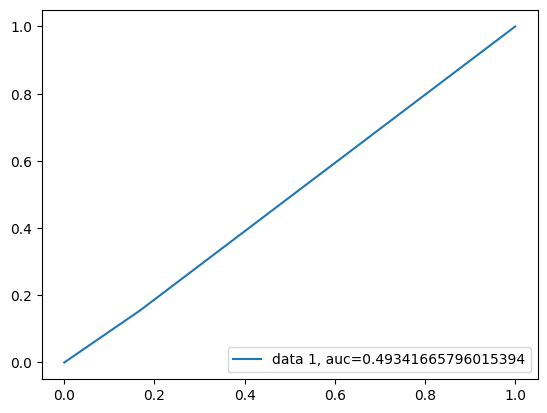

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn)
auc = metrics.roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# With the dataset for KNN model 2 that included the Customer ID as feature

In [ ]:
#Split Data into training set and test set before Preprocessing to prevent information leakage
X_2 = data.iloc[:,1:-1]
y = data.iloc[:,-1]

X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size = 0.2, random_state = 0)

#Preprocessing
scaler_norm = MinMaxScaler() #Perform Normalization to scaler large range data
scaler_power = PowerTransformer() #Perform Yeo-Johnson to correct skewness and outliners, and transforn non-normally distibution data into normally distibuted

X_train_2[["Loan Amount", "Term", "Debit to Income", "Public Record", "Inquires - six months", "Revolving Utilities", "Last week Pay"]] = scaler_norm.fit_transform(X_train_2[["Loan Amount", "Term", "Debit to Income", "Public Record", "Inquires - six months", "Revolving Utilities", "Last week Pay"]])
X_train_2[["Funded Amount", "Funded Amount Investor", "Interest Rate", "Delinquency - two years", "Home Ownership", "Open Account", "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Received Late Fee", "Recoveries", "Collection Recovery Fee", "Total Collection Amount", "Total Current Balance","Total Revolving Credit Limit"]] = scaler_power.fit_transform(X_train_2[["Funded Amount", "Funded Amount Investor", "Interest Rate", "Delinquency - two years", "Home Ownership", "Open Account", "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Received Late Fee", "Recoveries", "Collection Recovery Fee", "Total Collection Amount", "Total Current Balance","Total Revolving Credit Limit"]])
X_test_2[["Loan Amount", "Term", "Debit to Income", "Public Record", "Inquires - six months", "Revolving Utilities", "Last week Pay"]] = scaler_norm.fit_transform(X_test_2[["Loan Amount", "Term", "Debit to Income", "Public Record", "Inquires - six months", "Revolving Utilities", "Last week Pay"]])
X_test_2[["Funded Amount", "Funded Amount Investor", "Interest Rate", "Delinquency - two years", "Home Ownership", "Open Account", "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Received Late Fee", "Recoveries", "Collection Recovery Fee", "Total Collection Amount", "Total Current Balance","Total Revolving Credit Limit"]] = scaler_power.fit_transform(X_test_2[["Funded Amount", "Funded Amount Investor", "Interest Rate", "Delinquency - two years", "Home Ownership", "Open Account", "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Received Late Fee", "Recoveries", "Collection Recovery Fee", "Total Collection Amount", "Total Current Balance","Total Revolving Credit Limit"]])

le = LabelEncoder()
X_train_2["Batch Enrolled"] = le.fit_transform(X_train_2["Batch Enrolled"])
X_train_2["Grade"] = le.fit_transform(X_train_2["Grade"])
X_train_2["Sub Grade"] = le.fit_transform(X_train_2["Sub Grade"])
X_train_2["Loan Title"] = le.fit_transform(X_train_2["Loan Title"])
X_train_2["Employment Duration"] = le.fit_transform(X_train_2["Employment Duration"])
X_train_2["Verification Status"] = le.fit_transform(X_train_2["Verification Status"])
X_train_2["Payment Plan"] = le.fit_transform(X_train_2["Payment Plan"])
X_train_2["Initial List Status"] = le.fit_transform(X_train_2["Initial List Status"])
X_train_2["Application Type"] = le.fit_transform(X_train_2["Application Type"])
X_test_2["Batch Enrolled"] = le.fit_transform(X_test_2["Batch Enrolled"])
X_test_2["Grade"] = le.fit_transform(X_test_2["Grade"])
X_test_2["Sub Grade"] = le.fit_transform(X_test_2["Sub Grade"])
X_test_2["Loan Title"] = le.fit_transform(X_test_2["Loan Title"])
X_test_2["Employment Duration"] = le.fit_transform(X_test_2["Employment Duration"])
X_test_2["Verification Status"] = le.fit_transform(X_test_2["Verification Status"])
X_test_2["Payment Plan"] = le.fit_transform(X_test_2["Payment Plan"])
X_test_2["Initial List Status"] = le.fit_transform(X_test_2["Initial List Status"])
X_test_2["Application Type"] = le.fit_transform(X_test_2["Application Type"])

In [ ]:
#Nearest Neighbors (KNN)
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train KNN Classifer
clf_knn = clf_knn.fit(X_train_2,y_train)

#Predict the response for test dataset
y_pred_knn = clf_knn.predict(X_test_2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",precision_score(y_test, y_pred_knn))
print("Recall:",recall_score(y_test, y_pred_knn))
print("F1 Score:",f1_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9315673289183223
Precision: 0.8799803246433842
Recall: 0.9977691020635806
F1 Score: 0.9351803450078411
[[1587  244]
 [   4 1789]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1831
           1       0.88      1.00      0.94      1793

    accuracy                           0.93      3624
   macro avg       0.94      0.93      0.93      3624
weighted avg       0.94      0.93      0.93      3624



#Interpretation - KNN
The KNN model is a bad model as AUC lower than 50%. Accuracy: 0.4969646799116998
Precision: 0.47440273037542663
Recall: 0.1550474065811489
F1 Score: 0.23371164354770912
The model correctly predicted the class labels for approximately 49.69% of the loan status in the dataset.
47.44% of the data predicted as positive by the model were actually positive, while the model captured 15.50% of the actual positive class with recall score is the proportion of actual positive class that were correctly predicted by the model.
The model is struggling to effectively distinguish between the two classes as all the scores are relatively low with dataset without customer ID as feature.

#Pitfall - KNN
For KNN also has bias with imbalance dataset, but I resample the dataset in the very first beginning, which diminished the bias problem.  
The ID feature seems to have significant effective power for KNN and I included ID as feature, the Accurancy, precision, recall and F1 scores has exponential increase.  Accuracy: 0.9315673289183223
Precision: 0.8799803246433842
Recall: 0.9977691020635806
F1 Score: 0.9351803450078411
However, this dataset is cross-sectional data instead of time series data, the ID is susposed to have no prediction power as a feature.Therefore we probably need to select more relevant features for improving model performance.



In [ ]:
#SGD classifer object
clf_sgd = SGDClassifier()

# Train KNN Classifer
clf_sgd = clf_sgd.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_sgd = clf_sgd.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sgd))
print("Precision:",precision_score(y_test, y_pred_sgd))
print("Recall:",recall_score(y_test, y_pred_sgd))
print("F1 Score:",f1_score(y_test, y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

Accuracy: 0.5187637969094923
Precision: 0.5308176100628931
Recall: 0.23535973229224763
F1 Score: 0.3261205564142195
[[1458  373]
 [1371  422]]
              precision    recall  f1-score   support

           0       0.52      0.80      0.63      1831
           1       0.53      0.24      0.33      1793

    accuracy                           0.52      3624
   macro avg       0.52      0.52      0.48      3624
weighted avg       0.52      0.52      0.48      3624



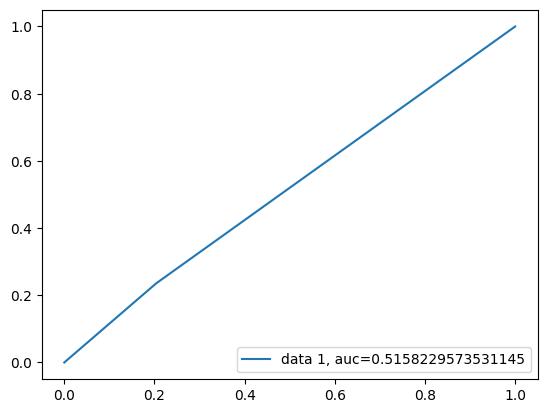

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_sgd)
auc = metrics.roc_auc_score(y_test, y_pred_sgd)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Interpretation - SGD
The KNN model is a bad model as AUC just slightly higher than 50%. Accuracy: 0.5187637969094923
Precision: 0.5308176100628931
Recall: 0.23535973229224763
F1 Score: 0.3261205564142195
The model correctly predicted the class labels for approximately 51.87% of the loan status in the dataset.
53.08% of the data predicted as positive by the model were actually positive, while the model captured 23.36% of the actual positive class with recall score is the proportion of actual positive class that were correctly predicted by the model.
The model is struggling to effectively distinguish between the two classes as all the scores are relatively low with dataset even with or without customer ID as feature (no difference for both dataset and even un-resample data).

#Pitfall - SGD
For SGD can been improve by doing hyperparameter tuning, but I tried several time for GridSearchCV and still return error with the parameters setup, therefore, I gave up to tune the hyperparamenter and just use the default setting in sklearn for SGDClassifer.
Furthermore, probably my choosen feature scaling method is not suitable for SGD model, as SGD model is usually benefited from feature scaling, but our result is not satisfied.

In conclusion, Decision Tree has the best performance with highest Accurancy (74%), F1-score and AUC, and ranks a random positive example higher than a random negative example 74% of the time. While both KNN and SGC has the worst performamce, only 49% and 51% Accurancy of the model, the model has no power to predict the loan status of the customers

# Feature Selection (35 points)
*10 points for correct code*

*15 points for correct reasoning and interpretation*

*10 points for explanation pitfalls*

Now that we've compared the performance of the different models, we place our judgement upon
the dimensionality of the data. The dimension reduction methods discussed so far are
L2 regularization and LASSO. Combining these methods gives us the Elastic Net method. What are some pitfalls of L2 regularization and of LASSO? How does Elastic Net overcome these pitfalls?

The Elastic Net method uses two parameters, l1_ratio and α. l1_ratio takes on a value between 0 and 1, and α a value higher than 0. Use the Elastic Net method to get an impression of the importance of the features, and make
an appropriate and argumented decision regarding their individual inclusion.

In [ ]:
#ElasticNet model cross validation
search_en = ElasticNetCV(cv=5, random_state=0)
search_en = search_en.fit(X_train, y_train)

# Look for the optimal alpha and l1_ratio
print("Optimal alpha:", search_en.alpha_)
print("Optimal l1_ratio:", search_en.l1_ratio_)

Optimal alpha: 0.00042260961022577654
Optimal l1_ratio: 0.5


In [ ]:
# Create ElasticNet model
elastic_net = ElasticNet(alpha=0.00042260961022577654, l1_ratio=0.5)

# Training data
elastic_net = elastic_net.fit(X_train, y_train)

# Get feature importance or coefficients and intercept
print("Feature Importance (Coefficients):", elastic_net.coef_)
print("Intercept:", elastic_net.intercept_)

# Make predictions
print("Predictions:", elastic_net.predict(X_test))

Feature Importance (Coefficients): [-0.02329259  0.00316564 -0.00932216  0.         -0.00116902  0.00837355
  0.00653635  0.00070661  0.00179698  0.00934324 -0.00398267  0.
  0.00092157 -0.03127696 -0.00430379 -0.11012566 -0.02222843  0.21623024
 -0.01288654 -0.01713286  0.00223679 -0.02380012  0.0019596  -0.00119333
  0.01053636 -0.0164818  -0.          0.          0.01001568  0.
  0.01207028 -0.00393599  0.0025498 ]
Intercept: 0.5154455461254034
Predictions: [0.42980419 0.40732151 0.61882737 ... 0.38603426 0.5465853  0.52042654]
                         Feature  Coefficient
0                    Loan Amount    -0.023293
1                  Funded Amount     0.003166
2         Funded Amount Investor    -0.009322
3                           Term     0.000000
4                 Batch Enrolled    -0.001169
5                  Interest Rate     0.008374
6                          Grade     0.006536
7                      Sub Grade     0.000707
8            Employment Duration     0.001797
9  

In [ ]:
#make the coefficients look nicer
feature_names = X.columns
feature_importance = pd.DataFrame({"Feature": feature_names,'Coefficient': elastic_net.coef_})
print(feature_importance)

                         Feature  Coefficient
0                    Loan Amount    -0.023293
1                  Funded Amount     0.003166
2         Funded Amount Investor    -0.009322
3                           Term     0.000000
4                 Batch Enrolled    -0.001169
5                  Interest Rate     0.008374
6                          Grade     0.006536
7                      Sub Grade     0.000707
8            Employment Duration     0.001797
9                 Home Ownership     0.009343
10           Verification Status    -0.003983
11                  Payment Plan     0.000000
12                    Loan Title     0.000922
13               Debit to Income    -0.031277
14       Delinquency - two years    -0.004304
15         Inquires - six months    -0.110126
16                  Open Account    -0.022228
17                 Public Record     0.216230
18             Revolving Balance    -0.012887
19           Revolving Utilities    -0.017133
20                Total Accounts  

# Recommendation (10 points)
*10 points for paper*

Now that you've made an assessment of the key features and it is clear which model performs best, it is time to write a recommendation to Kiwibank. Explain what you have researched and present your results in a short paper in no more than 400 words.

Focus on the bank's wants and needs, and minimize the technical talk. We recommend writing in LaTeX/Overleaf, but Word or another application is also fine. Hand the paper in as PDF, together with your Jupyter Notebook, in a ZIP-file.